In [24]:
import pickle
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys,os

import visualizations
import constants
from config import targets

In [25]:
# Set parameters
constants.HISTORY_LENGTH=1
GRID_SIZE = 25
constants.GRID_SIZE=GRID_SIZE
TARGET = targets(GRID_SIZE)['square']
ITERATIONS = 50

In [34]:
filename = 'data/exp1_ksweep/error/error_square25_1250gens_400ps_50i_k25_run1.p'

with open(filename, 'rb') as f:
    best,stats = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/exp1_ksweep/error/error_square25_2000gens_400ps_50i_k25_N4_run7.p'

In [27]:
# Run NCA as in training
train_history = best.playback(iterations=ITERATIONS)

# Initial state
init_grid = train_history[0]

# Final state
final_state = train_history[-1]

/Users/caitlingrasso/research/empowered-nca-II/util.py:66: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-x))


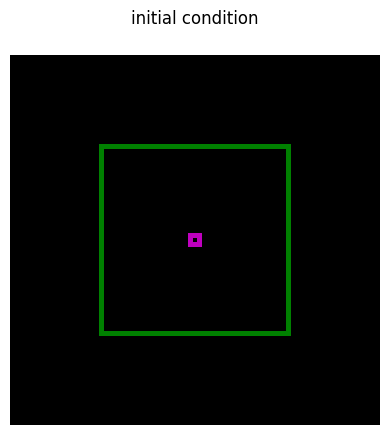

In [28]:
# Visualize initial condition
visualizations.display_body_signal(init_grid, target=TARGET, title='initial condition', original_size=GRID_SIZE)


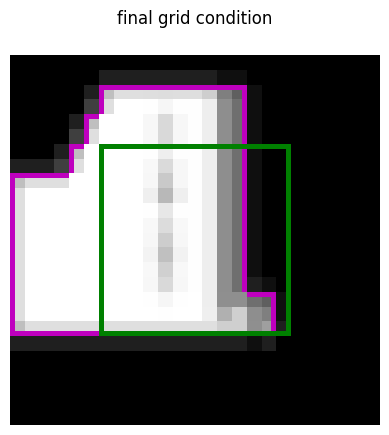

Loss: 0.20097254901960782
Empowerment (k=1): 1.1259428775577627


In [29]:
# Visualize final grid state of the NCA
visualizations.display_body_signal(final_state, target=TARGET, title='final grid condition', original_size=GRID_SIZE)
# visualizations.display_body_signal(final_state, target=TARGET, title='', original_size=GRID_SIZE, save=True, fn='gecco23_figs/best_xenobot.png')

# Print loss and empowerment
best.evaluate(['error','MI'], TARGET,g=2000)
print('Loss:', best.get_objective('error'))
print('Empowerment (k={}):'.format(constants.HISTORY_LENGTH), best.get_objective('MI')*-1)

In [ ]:
# Save movie
os.makedirs('results/', exist_ok=True)
os.makedirs('results/exp7_noisy_signaling', exist_ok=True)
video_filename = 'results/exp7_noisy_signaling/'+filename.split('/')[-1].split('.')[0]+'.mp4'
visualizations.save_movie(train_history, video_filename, original_size=GRID_SIZE)

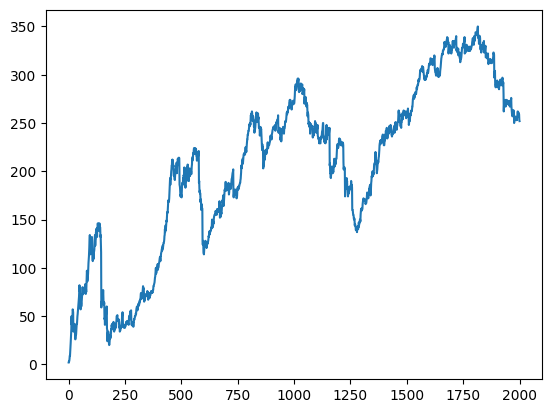

In [33]:
plt.plot(stats[-1])